In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [179]:
import kagglehub
path = kagglehub.dataset_download("hesh97/titanicdataset-traincsv")

Using Colab cache for faster access to the 'titanicdataset-traincsv' dataset.


0-- died
1 -- survived

In [180]:
df = pd.read_csv(path + "/train.csv")

In [181]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
df.shape

(891, 12)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [184]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


handling the missing values


In [185]:
df.drop(columns = 'Cabin', inplace = True)


In [186]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [187]:
df['Age'].mean()

np.float64(29.69911764705882)

In [188]:
# df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [189]:
df['Embarked'].mode()[0]

'S'

In [190]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [191]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [192]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [193]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


data visualization

In [194]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

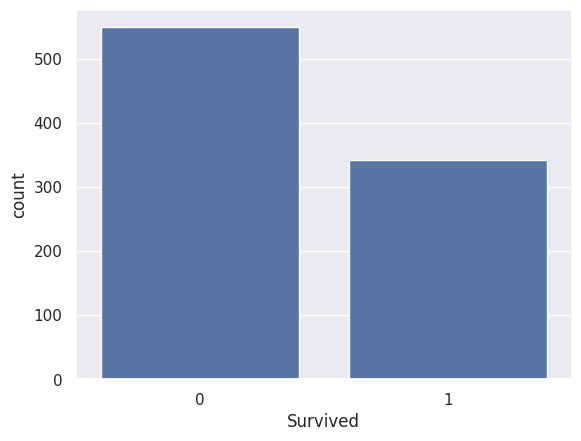

In [195]:
#countplot for survived column

sns.countplot(x = 'Survived', data = df)


<Axes: xlabel='Sex', ylabel='count'>

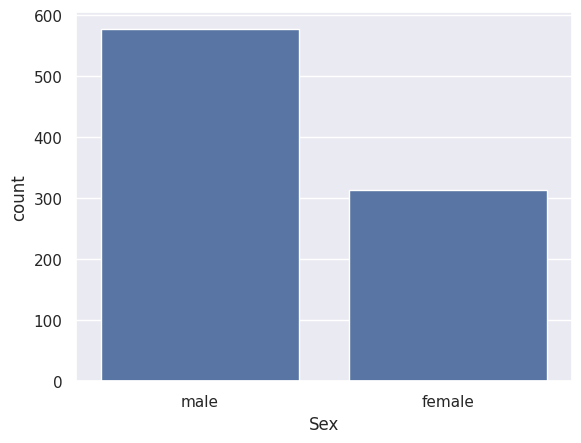

In [196]:
sns.countplot(x = 'Sex', data = df)

In [197]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

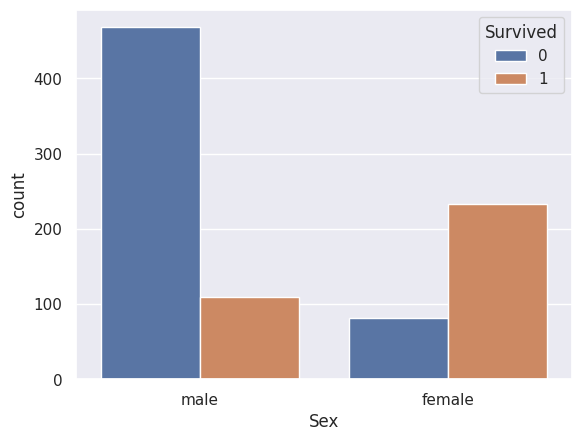

In [198]:
#number of survivors gender based

sns.countplot(x = 'Sex', hue = 'Survived', data = df)

<Axes: xlabel='Pclass', ylabel='count'>

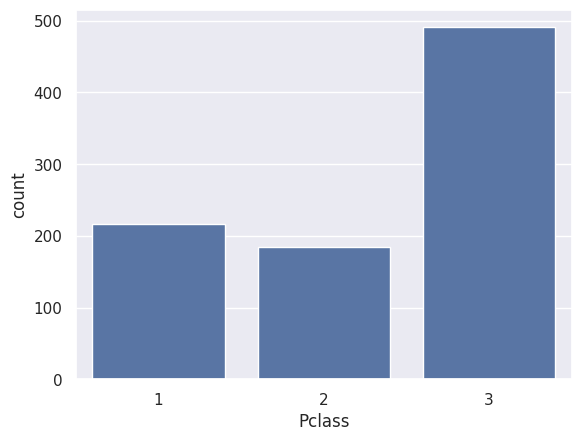

In [199]:
sns.countplot(x = 'Pclass', data = df)

<Axes: xlabel='Pclass', ylabel='count'>

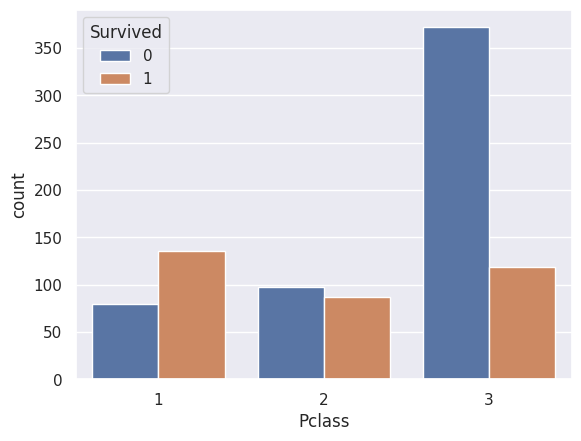

In [200]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)

<Axes: xlabel='Embarked', ylabel='count'>

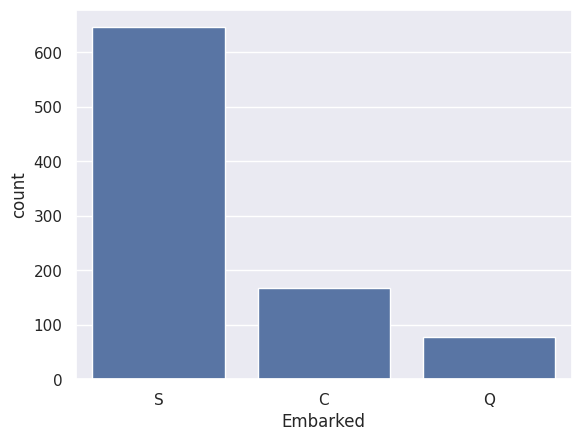

In [201]:
sns.countplot(x = 'Embarked', data = df)

<Axes: xlabel='Embarked', ylabel='count'>

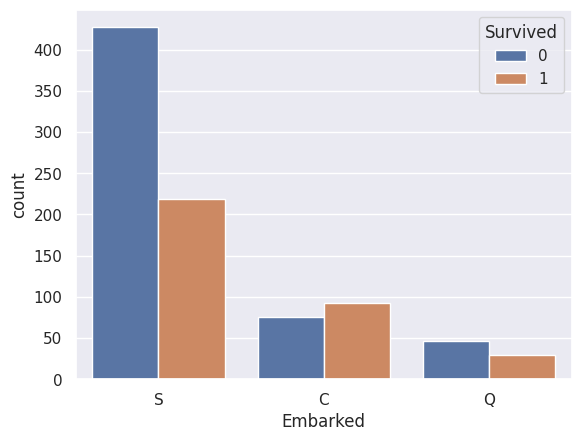

In [202]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = df)

encoding categorical columns

In [203]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [204]:
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [205]:
df.drop(columns = 'Name', inplace = True)

In [206]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0
4,5,0,3,0,35.0,0,0,373450,8.0500,0


In [207]:
df.drop(columns='Ticket',inplace=True)

In [208]:
df.drop(columns='PassengerId',inplace=True)

In [209]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [210]:

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline


In [211]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']


In [212]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [213]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train[num_cols], y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [214]:
test_pred = pipeline.predict(X_test[num_cols])
ac=accuracy_score(y_test, test_pred)
print(ac)

0.6815642458100558


In [215]:
from sklearn.pipeline import Pipeline

In [216]:
def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    input_data = pd.DataFrame([{
        'Age': age,
        'Fare': fare,
        'SibSp': sibsp,
        'Parch': parch
    }])

    prediction = pipeline.predict(input_data)[0]
    probability = pipeline.predict_proba(input_data)[0][1]

    return prediction, probability


In [217]:
result, prob = predict_survival(
    pclass=3,
    sex=0,       # male
    age=25,
    sibsp=0,
    parch=0,
    fare=7.25,
    embarked=0
)

print("Survived:", result)
print("Survival Probability:", round(prob, 2))


Survived: 0
Survival Probability: 0.34


In [218]:
#feture engineering to improve

import numpy as np

df_fe = df.copy()

df_fe['FamilySize'] = df_fe['SibSp'] + df_fe['Parch'] + 1
df_fe['IsAlone'] = (df_fe['FamilySize'] == 1).astype(int)
df_fe['FareLog'] = np.log1p(df_fe['Fare'])

df_fe['AgeGroup'] = pd.cut(
    df_fe['Age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=[0, 1, 2, 3, 4]
).astype(int)


In [219]:
X = df_fe[[
    'Pclass', 'Sex', 'Age', 'FareLog',
    'FamilySize', 'IsAlone', 'AgeGroup'
]]
y = df_fe['Survived']


In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [221]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [222]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8100558659217877


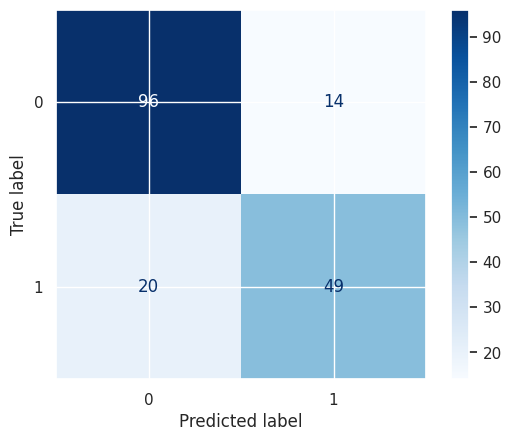

In [223]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.show()


ROC-AUC: 0.8474308300395257


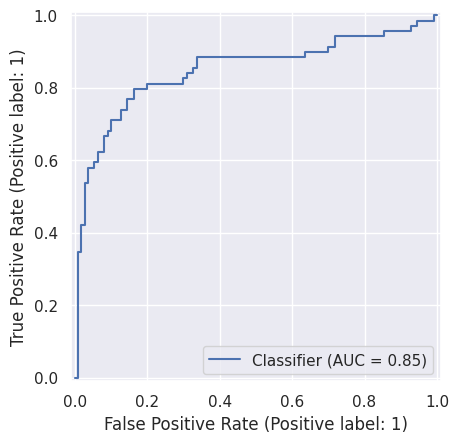

In [224]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_prob = pipeline.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))

RocCurveDisplay.from_predictions(y_test, y_prob)
plt.show()


In [225]:
import pandas as pd

coeffs = pipeline.named_steps['model'].coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coeffs
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


      Feature  Coefficient
1         Sex     1.263160
3     FareLog     0.397379
2         Age    -0.152759
5     IsAlone    -0.229587
6    AgeGroup    -0.371070
4  FamilySize    -0.652638
0      Pclass    -0.679256


In [226]:
def predict_survival_inference(
    pclass, sex, age, sibsp, parch, fare
):
    import pandas as pd
    import numpy as np

    # Feature Engineering
    family_size = sibsp + parch + 1
    is_alone = 1 if family_size == 1 else 0
    fare_log = np.log1p(fare)

    age_group = pd.cut(
        [age],
        bins=[0, 12, 18, 35, 60, 100],
        labels=[0, 1, 2, 3, 4]
    )[0]

    input_df = pd.DataFrame([{
        'Pclass': pclass,
        'Sex': sex,
        'Age': age,
        'FareLog': fare_log,
        'FamilySize': family_size,
        'IsAlone': is_alone,
        'AgeGroup': int(age_group)
    }])

    pred = pipeline.predict(input_df)[0]
    prob = pipeline.predict_proba(input_df)[0][1]

    status = "Survived" if pred == 1 else "Not Survived"

    return {
        "Prediction": int(pred),
        "Status": status,
        "Survival_Probability": round(prob, 3)
    }


In [227]:
result = predict_survival_inference(
    pclass=3,
    sex=0,    # male
    age=25,
    sibsp=0,
    parch=0,
    fare=7.25
)

print(result)


{'Prediction': 0, 'Status': 'Not Survived', 'Survival_Probability': np.float64(0.097)}


In [228]:
result = predict_survival_inference(
    pclass=1,
    sex=1,    # female
    age=22,
    sibsp=0,
    parch=0,
    fare=80
)

print(result)


{'Prediction': 1, 'Status': 'Survived', 'Survival_Probability': np.float64(0.953)}
